In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
df=sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
df.groupby("method")[["distance"]].sum()

,distance
method,
Astrometry,35.75
Eclipse Timing Variations,1261.44
Imaging,2166.91
Microlensing,41440.00
Orbital Brightness Modulation,2360.00
Pulsar Timing,1200.00
Pulsation Timing Variations,0.00
Radial Velocity,27348.11
Transit,134242.77


In [6]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [9]:
df.groupby("method").aggregate([np.min,np.median,np.max]).head(2)

number             orbital_period                    \
                            amin median amax           amin   median     amax   
method                                                                          
Astrometry                     1    1.0    1         246.36   631.18   1016.0   
Eclipse Timing Variations      1    2.0    2        1916.25  4343.50  10220.0   

                          mass              distance                   year  \
                          amin median  amax     amin   median    amax  amin   
method                                                                        
Astrometry                 NaN    NaN   NaN    14.98   17.875   20.77  2010   
Eclipse Timing Variations  4.2  5.125  6.05   130.72  315.360  500.00  2008   

                                         
                           median  amax  
method                                   
Astrometry                 2011.5  2013  
Eclipse Timing Variations  2010.0  2012

In [15]:
df.groupby("method").filter(lambda x:x ["distance"].mean()<50)

,method,number,orbital_period,mass,distance,year
113,Astrometry,1,246.36,NaN,20.77,2013
537,Astrometry,1,1016.00,NaN,14.98,2010


In [16]:
df.apply(np.sum)

method            Radial VelocityRadial VelocityRadial VelocityR...
number                                                         1848
orbital_period                                       1986894.255326
mass                                                     1353.37638
distance                                                  213367.98
year                                                        2079388
dtype: object

In [17]:
data = pd.DataFrame([('bird', 389.0),
                     ('bird', 40.0), ('bird', 405.0),
                     ('mammal', 80.2),
                     ('mammal', 12.0),('mammal', 58)],
                     index=['falcon', 'parrot', 'eagle', 'lion', 'monkey', 'leopard'],
                    columns=('class', 'speed'))
data

,class,speed
falcon,bird,389.0
parrot,bird,40.0
eagle,bird,405.0
lion,mammal,80.2
monkey,mammal,12.0
leopard,mammal,58.0


In [18]:
data.speed.max()

405.0

In [19]:
data.groupby("class").max()

,speed
class,
bird,405.0
mammal,80.2


In [20]:
data = pd.DataFrame([('bird', 389.0),
                     ('bird', 40.0), ('bird', 405.0),
                     ('mammal', 80.2),
                     ('mammal', 12.0),('mammal', 58)],
                     index=['falcon', 'parrot', 'eagle', 'lion', 'monkey', 'leopard'],
                    columns=('class', 'speed'))
data

,class,speed
falcon,bird,389.0
parrot,bird,40.0
eagle,bird,405.0
lion,mammal,80.2
monkey,mammal,12.0
leopard,mammal,58.0


In [21]:
data.groupby("class").mean()

,speed
class,
bird,278.000000
mammal,50.066667


In [22]:
titanic=sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
titanic.pivot_table(values="age",index="sex",columns="class")

class,First,Second,Third
sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [26]:
data={"A":["foo","foo","foo","bar","bar","bar"],
     "B":["one","one","two","two","one","one"],
     "C":["x","y","x","y","x","y"],
     "D":[1,3,2,5,4,1]}
df=pd.DataFrame(data)
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [28]:
df.groupby(["A","B","C"])[["D"]].aggregate("mean").stack()

A    B    C   
bar  one  x  D    4.0
          y  D    1.0
     two  y  D    5.0
foo  one  x  D    1.0
          y  D    3.0
     two  x  D    2.0
dtype: float64

In [29]:
df.groupby(["A","B","C"])[["D"]].aggregate("mean").unstack()

D     
C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

In [30]:
df.groupby(["A","B","C"])[["D"]].aggregate("mean").unstack().unstack()

D               
C      x         y     
B    one  two  one  two
A                      
bar  4.0  NaN  1.0  5.0
foo  1.0  2.0  3.0  NaN

In [33]:
data={"col1":[1,2,3,4],
      "col2":[444,555,666,444]
     }
df=pd.DataFrame(data)
df

,col1,col2
0,1,444
1,2,555
2,3,666
3,4,444


In [34]:
df.apply(np.mean)

col1      2.50
col2    527.25
dtype: float64

In [35]:
df.applymap(lambda x:x*5)

,col1,col2
0,5,2220
1,10,2775
2,15,3330
3,20,2220


In [36]:
df.col1.map({3:"A"})

0    NaN
1    NaN
2      A
3    NaN
Name: col1, dtype: object

In [39]:
data={"Company":["FB","GOOG","MSFT","GOOG","MSFT","FB"],
     "Person":["Edward","Charlie","Amy","Vanessa","Carl","Sarah"],
     "Sales":["200","120","340","124","243","350"],
     }
df=pd.DataFrame(data)
df

,Company,Person,Sales
0,FB,Edward,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,GOOG,Vanessa,124
4,MSFT,Carl,243
5,FB,Sarah,350


In [40]:
df.Company.unique()

array(['FB', 'GOOG', 'MSFT'], dtype=object)

In [41]:
df.Company.nunique()

3

In [42]:
df.Company.value_counts()

FB      2
GOOG    2
MSFT    2
Name: Company, dtype: int64

In [43]:
df.Company.sort_values()

0      FB
5      FB
1    GOOG
3    GOOG
2    MSFT
4    MSFT
Name: Company, dtype: object

In [44]:
flights=sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [47]:
flights.isnull().sum() 

year          0
month         0
passengers    0
dtype: int64

In [48]:
flights.passengers.dropna().isnull().sum()

0

In [49]:
flights.passengers.isnull().sum()

0

In [50]:
flights.passengers

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

In [51]:
titanic.isnull().sum() 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [52]:
titanic.age.dropna().isnull().sum()

0

In [53]:
titanic.age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [54]:
titanic.age.head(10).replace([np.nan],method="bfill")
#replace method similar to fillna “fill in” NA values with non-null values.

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    54.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [55]:
#interpolate method uses various interpolation technique to fill the
#missing values.

In [56]:
titanic.age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [57]:
titanic.age.head(10).interpolate()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    44.5
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [58]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float","int64"])
df=df.dropna()
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [60]:
df_table=df.table
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [63]:
Q1=df_table.quantile(0.25)
Q3=df_table.quantile(0.75)
IQR=Q3-Q1
IQR

3.0

In [64]:
lower_lim=Q1-1.5*IQR
lower_lim


51.5

In [65]:
upper_lim=Q3+1.5*IQR
upper_lim

63.5

In [66]:
df[(df.table>=lower_lim)&(df.table<upper_lim)]

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [67]:
from scipy.stats.mstats import winsorize
df_win=winsorize(df.table,(0.001,0.019))

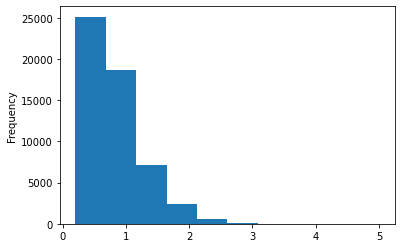

In [68]:
df.carat.plot(kind="hist");

In [69]:
df["log_carat"]=np.log(df.carat)
df

,carat,depth,table,price,x,y,z,log_carat
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


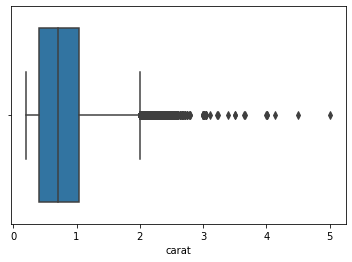

In [70]:
sns.boxplot(x=df.carat);

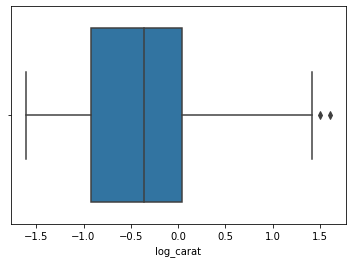

In [74]:
sns.boxplot(x=df.log_carat);

In [75]:
data = pd.DataFrame({'A':[3,np.nan,np.nan],
                  'B':[5,7,np.nan],
                  'C':[4,2,7]})
data     

,A,B,C
0,3.0,5.0,4
1,NaN,7.0,2
2,NaN,NaN,7


In [78]:
data.dropna(inplace=True)  or data.dropna(axis=0, inplace=True)
data

,C
0,4
1,2
2,7


In [79]:
import numpy as np
import pandas as pd
data = pd.DataFrame({'A':[3,np.nan,np.nan],
                  'B':[5,7,np.nan],
                  'C':[4,2,7]})
data

,A,B,C
0,3.0,5.0,4
1,NaN,7.0,2
2,NaN,NaN,7


In [80]:
data['B'].fillna(value=data['B'].mean(), inplace=True)


In [81]:
data

,A,B,C
0,3.0,5.0,4
1,NaN,7.0,2
2,NaN,6.0,7


In [82]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2'],  'A': ['A0', 'A1', 'A2'], 'B': ['B0', 'B1', 'B2']})

In [86]:
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'], "C": ['C0', 'C1', 'C2', 'C3'], 'D': ['D0', 'D1', 'D2', 'D3']})

In [87]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2


In [88]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [89]:
# Merge;merges DataFrame or named Series objects with a 
# database-style join like SQL.  It is used to combine two 
# or more dataframes on the basis of values of common columns.

In [90]:
pd.merge(left,right,on="key",how="inner")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [91]:
# Join; joins columns with other DataFrame either on index or on a key column.
# It is used to merge 2 dataframes on the basis of the index; instead of 
# using merge(left_index=True) we can use join().

In [96]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'], 'B': ['B0', 'B1', 'B2']}, 
                    index = ['K0', 'K1', 'K2']) 
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'], 'D': ['D0', 'D2', 'D3']},
                     index = ['K0', 'K2', 'K3'])


In [97]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [98]:
left.join(right,how="inner")

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [99]:
# Concat; Concatenate pandas objects along a particular axis.
# It is a kind of appending dataframes one over another or one next to another.

In [100]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],  'B': ['B0', 'B1', 'B2', 'B3'], 'C': ['C0', 'C1', 'C2', 'C3'], 'D': ['D0', 'D1', 'D2', 'D3']})

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],  'B': ['B4', 'B5', 'B6', 'B7'], 'C': ['C4', 'C5', 'C6', 'C7'], 'D': ['D4', 'D5', 'D6', 'D7']}) 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'], 'B': ['B8', 'B9', 'B10', 'B11'], 'C': ['C8', 'C9', 'C10', 'C11'], 'D': ['D8', 'D9', 'D10', 'D11']})

In [101]:
pd.concat([df1,df2,df3],ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [102]:
pd.concat([df1,df2,df3],axis=0)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7
0,A8,B8,C8,D8
1,A9,B9,C9,D9


In [103]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11


In [104]:
#In Pandas merge() and join() are used for a horizontal combination,  whereas concat() and append() 
#are used for vertical combination.

In [105]:
data1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                        'B': ['B0', 'B1', 'B2'],
                        'C': ['C0', 'C1', 'C2']},
                        index=[0, 1, 2])
data1

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [106]:
data2 = pd.DataFrame({'A': ['A3', 'A4', 'A5'],
                        'B': ['B3', 'B4', 'B5'],
                        'C': ['C3', 'C4', 'C5']},
                         index=[3, 4, 5]) 
data2

,A,B,C
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5


In [107]:

pd.concat([data1,data2], axis=1)

,A,B,C,A,B,C
0,A0,B0,C0,NaN,NaN,NaN
1,A1,B1,C1,NaN,NaN,NaN
2,A2,B2,C2,NaN,NaN,NaN
3,NaN,NaN,NaN,A3,B3,C3
4,NaN,NaN,NaN,A4,B4,C4
5,NaN,NaN,NaN,A5,B5,C5


In [108]:
pd.merge(data1, data2)

,A,B,C


In [110]:
pd.concat([data1,data2], axis=0)


,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5


In [111]:
df=sns.load_dataset("titanic")
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [112]:
#lower(): Converts strings to lower case

In [114]:
df.embark_town=df.embark_town.str.lower()
df.embark_town.head(3)

0    southampton
1      cherbourg
2    southampton
Name: embark_town, dtype: object

In [115]:
df.sex=df.sex.str.upper()
df.sex.head()

0      MALE
1    FEMALE
2    FEMALE
3    FEMALE
4      MALE
Name: sex, dtype: object

In [117]:
df.sex.head(2).str.islower()
#islower() : Checks whether all characters in each string in lower case or not. Returns Boolean

0    False
1    False
Name: sex, dtype: bool

In [118]:
#isupper() : Checks whether all characters in each string in upper case or not. Returns Boolean
df.sex.head(2).str.isupper()

0    True
1    True
Name: sex, dtype: bool

In [119]:
#isdigit() : Check whether all characters in each string are digits.
df.pclass.astype("string").str.isdigit().head(2)

0    True
1    True
Name: pclass, dtype: boolean

In [120]:
#replace(): Replaces the value a with the value b

In [125]:
df["age"]=df["age"].replace(np.nan,"UNKNOWN")
df["age"]

0         22.0
1         38.0
2         26.0
3         35.0
4         35.0
        ...   
886       27.0
887       19.0
888    UNKNOWN
889       26.0
890       32.0
Name: age, Length: 891, dtype: object

In [127]:
#contains(): Returns a Boolean value True for each element if 
#the substring contains in the element, else False
df[df.sibsp.astype("string").str.contains("1")].head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,MALE,22.0,1,0,7.2500,S,Third,man,True,NaN,southampton,no,False
1,1,1,FEMALE,38.0,1,0,71.2833,C,First,woman,False,C,cherbourg,yes,False


In [128]:
df.sex.str.split("MALE").head(2)

0      [, ]
1    [FE, ]
Name: sex, dtype: object

In [130]:
df.sex.str.strip("LE").head()

0      MA
1    FEMA
2    FEMA
3    FEMA
4      MA
Name: sex, dtype: object

In [131]:
df.embark_town.str.find("southampton").head(2)

0    0.0
1   -1.0
Name: embark_town, dtype: float64

In [132]:
df.embark_town.str.findall("southampton").head()

0    [southampton]
1               []
2    [southampton]
3    [southampton]
4    [southampton]
Name: embark_town, dtype: object

In [133]:
df=sns.load_dataset("flights")
df.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [135]:
df["year"]=pd.to_datetime(df["year"],format="%Y")
df.year.head(3)

0   1949-01-01
1   1949-01-01
2   1949-01-01
Name: year, dtype: datetime64[ns]

In [136]:
from datetime import datetime
current_date=datetime.now()
current_date

datetime.datetime(2022, 4, 30, 2, 7, 33, 450014)

In [146]:
date=current_date.strftime(("%d"+" "+"%B"+" "+"%Y"))
date

#strptime - parse a string into a datetime object given a corresponding format

'30 April 2022'

In [149]:
#datetime.strptime(date, '%d %b %Y')

In [150]:
from datetime import timedelta
two_days_before=current_date.now()-timedelta(days=2)
two_days_before

datetime.datetime(2022, 4, 28, 2, 15, 39, 567423)